<a href="https://colab.research.google.com/github/RhiannaSun/Data-Analysis-project-on-COVID-19/blob/master/QAcheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
xls = pd.ExcelFile('/content/orginal_fil.xlsx')
df1 = pd.read_excel(xls, 'Q4 2013 Raw Data')

## Data Inspection

In [4]:
df1.dtypes

Deal ID                   object
Units Sold               float64
Billings                 float64
Start Date        datetime64[ns]
Deal URL                  object
Segment                   object
Inventory Type            object
dtype: object

In [43]:
df = df1[['Deal ID', 'Units Sold', 'Billings', 'Start Date', 'Deal URL', 'Segment', 'Inventory Type']]

In [113]:
print(f'There is {df.duplicated().sum()} duplicate rows')

There is 0 duplicate rows


In [115]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Deal ID           0
Units Sold        0
Billings          0
Start Date        0
Deal URL          0
Segment           0
Inventory Type    0
dtype: int64


In [122]:
print(" \nCount total Zeros at each column in a DataFrame : \n\n",
      (df == 0).sum(axis=0))

 
Count total Zeros at each column in a DataFrame : 

 Deal ID               0
Units Sold        26774
Billings          26774
Start Date            0
Deal URL              0
Segment               0
Inventory Type        0
dtype: int64


In [28]:
df.head(5)

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
0,gr-millevois-tire-service-center,0.000,0.000,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party,nan
1,gr-manakeesh-cafe-bakery,0.000,0.000,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party,nan
2,gr-phoenix-salon-and-spa,0.000,0.000,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party,nan
3,gr-hands-in-motion,0.000,0.000,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party,nan
4,dc-fd2-bartending-college-allentown-reading,86.800,4253.200,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party,49.000


In [140]:
df['remove_www'] = df['Deal URL'].apply(lambda x: x[29:])
df[df['Deal ID'] != df['remove_www']].head(10)

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,remove_www
63856,american-apparel-us-boise,1689.500,57770.000,2013-11-18,http://www.groupon.com/deals/american-apparel-...,Local,Third - Party,american-apparel-us-boise?utm_campaign=3383227...
64051,chefo-s-pancake-house,294.300,2207.250,2013-11-18,http://www.groupon.com/deals/chefo-s-pancake-h...,Local,Third - Party,chefo-s-pancake-house?utm_medium=email&utm_sou...
64054,hands-on-healing-massage-therapy-2,74.400,2901.600,2013-11-18,http://www.groupon.com/deals/hands-on-healing-...,Local,Third - Party,hands-on-healing-massage-therapy-2?utm_medium=...
64116,glendale-urgent-care-medical-group,29.800,4936.200,2013-11-18,http://www.groupon.com/deals/glendale-urgent-c...,Local,Third - Party,glendale-urgent-care-medical-group?utm_campaig...
64134,american-apparel-us-ventura-county,461.900,15800.000,2013-11-18,http://www.groupon.com/deals/american-apparel-...,Local,Third - Party,american-apparel-us-ventura-county?utm_campaig...
65124,ga-treetops-resort-4,457.800,45322.200,2013-11-19,http://www.groupon.com/deals/ga-treetops-resor...,Travel,Third - Party,ga-treetops-resort-4?utm_campaign=us_dt_sea_gg...
65344,american-apparel-us-appleton,47.200,1569.000,2013-11-19,http://www.groupon.com/deals/american-apparel-...,Local,Third - Party,american-apparel-us-appleton?utm_medium=email&...
65496,gg-7in-8gb-samsung-galaxy-tab-2,1674.400,217655.256,2013-11-20,http://www.groupon.com/deals/gg-7in-8gb-samsun...,Goods,Third - Party,gg-7in-8gb-samsung-galaxy-tab-2?utm_campaign=u...
65739,thai-taste-1,730.300,10954.500,2013-11-20,http://www.groupon.com/deals/thai-taste-1?utm_...,Local,Third - Party,thai-taste-1?utm_medium=email&utm_source=newsl...
65808,yesvideo-9,24.800,495.752,2013-11-20,http://www.groupon.com/deals/yesvideo-9?utm_ca...,Local,Third - Party,yesvideo-9?utm_campaign=livingstory&utm_medium...


In [138]:
df[df['Deal ID'] != df['remove_www']]['Inventory Type'].unique()

array(['Third - Party'], dtype=object)

In [45]:
df.describe()

,Units Sold,Billings
count,138534.000,138534.000
mean,178.463,5500.602
std,864.552,27746.530
min,-9100.000,-218062.901
25%,1.450,63.800
50%,19.200,850.200
75%,99.200,3677.450
max,62500.000,2874885.000


## Local

In [91]:
local = df1[(df1.Segment == 'Local')]

In [92]:
local.describe()

,Units Sold,Billings
count,120576.000,120576.000
mean,115.483,3393.898
std,593.890,13622.551
min,-9100.000,-218062.901
25%,1.450,34.800
50%,13.850,654.000
75%,68.400,2727.039
max,62500.000,1371875.000


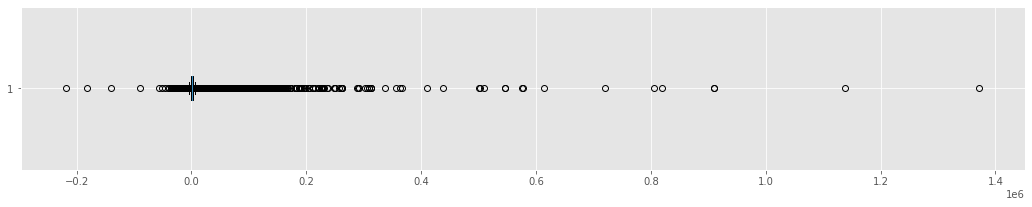

In [93]:
plt.figure(figsize=(18,3))
_=plt.boxplot(local['Billings'],vert=False)

In [105]:
local.iloc[np.argsort(list(local['Billings']))[-5:]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
58416,zazzle-18,27300.000,818727.000,2013-11-01,http://www.groupon.com/deals/zazzle-18,Local,Third - Party
74496,picanova,45500.000,909545.000,2013-11-27,http://www.groupon.com/deals/picanova,Local,Third - Party
60451,vistaprint-13,45500.000,910000.000,2013-11-07,http://www.groupon.com/deals/vistaprint-13,Local,Third - Party
68144,coldwater-creek-amarillo-3,45500.000,1137500.000,2013-11-26,http://www.groupon.com/deals/coldwater-creek-a...,Local,Third - Party
119224,cinetopia-29,62500.000,1371875.000,2013-12-13,http://www.groupon.com/deals/cinetopia-29?utm_...,Local,Third - Party


In [106]:
local.iloc[np.argsort(list(local['Billings']))[:5]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
15565,icon-parking-23-long-island-westchester-county,-2.200,-218062.901,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,Third - Party
18792,sacramento-zoo-4,-7280.000,-182000.000,2013-05-29,http://www.groupon.com/deals/sacramento-zoo-4,Local,Third - Party
15567,icon-parking-23-long-island,-3.650,-140086.263,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,Third - Party
7551,times-scare-new-york-city,-1820.000,-89180.000,2013-02-16,http://www.groupon.com/deals/times-scare-new-y...,Local,Third - Party
17799,ultimate-beerfest,-1911.100,-57376.500,2013-05-23,http://www.groupon.com/deals/ultimate-beerfest,Local,Third - Party


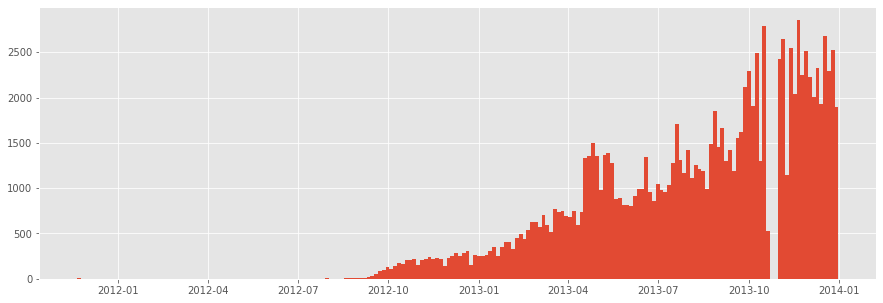

In [75]:
plt.figure(figsize=(15,5))
_=plt.hist(local['Start Date'],bins=200)

In [143]:
local['Unit Price'] = local.apply(lambda x: np.nan if x['Billings'] == 0 else x['Billings']/x['Units Sold'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


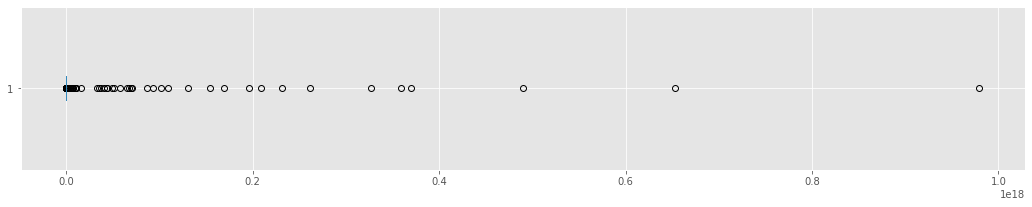

In [243]:
cleanedList = [x for x in list(local['Unit Price']) if str(x) != 'nan']
plt.figure(figsize=(18,3))
_=plt.boxplot(cleanedList,vert=False)

In [145]:
local.describe()

,Units Sold,Billings,Unit Price
count,120576.000,120576.000,94823.000
mean,115.483,3393.898,59867213030824.266
std,593.890,13622.551,4975576942067955.000
min,-9100.000,-218062.901,0.148
25%,1.450,34.800,25.000
50%,13.850,654.000,39.000
75%,68.400,2727.039,64.990
max,62500.000,1371875.000,979532918953082624.000


In [216]:
local.iloc[np.argsort(list(local['Unit Price']))[:9]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
25784,icon-parking-36,-29.800,-4.400,2013-07-05,http://www.groupon.com/deals/icon-parking-36,Local,Third - Party,0.148
34068,stars-sandwich-market-1,-54.500,-10.900,2013-08-16,http://www.groupon.com/deals/stars-sandwich-ma...,Local,Third - Party,0.200
39271,connie-dale-massage,-5.800,-1.400,2013-09-06,http://www.groupon.com/deals/connie-dale-massage,Local,Third - Party,0.241
32907,speed-usa-dating-parent-10,8.050,3.750,2013-08-11,http://www.groupon.com/deals/speed-usa-dating-...,Local,Third - Party,0.466
35671,bayou-snack-shack-1,-65.400,-32.700,2013-08-23,http://www.groupon.com/deals/bayou-snack-shack-1,Local,Third - Party,0.500
35672,lucia-at-avenue-salon,-54.100,-27.300,2013-08-23,http://www.groupon.com/deals/lucia-at-avenue-s...,Local,Third - Party,0.505
36373,campbell-s-restaurant-and-steakhouse-3,272.500,185.300,2013-08-26,http://www.groupon.com/deals/campbell-s-restau...,Local,Third - Party,0.680
3642,brooklyn-banya-5,5808.800,4582.500,2012-12-14,http://www.groupon.com/deals/brooklyn-banya-5,Local,Third - Party,0.789
78419,city-view-trolley-tours-3,0.000,0.000,2013-04-29,http://www.groupon.com/deals/city-view-trolley...,Local,Third - Party,0.800


In [213]:
local.iloc[np.argsort(list(local['Unit Price']))[-25799:-25753]].head(10)

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
15567,icon-parking-23-long-island,-3.650,-140086.263,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,Third - Party,38379.798
15565,icon-parking-23-long-island-westchester-county,-2.200,-218062.901,2013-04-22,http://www.groupon.com/deals/icon-parking-23-l...,Local,Third - Party,99119.500
19205,gateway-fun-park-1,-0.000,-272.500,2013-05-31,http://www.groupon.com/deals/gateway-fun-park-1,Local,Third - Party,1198467674275852.000
84190,space-golf-5,0.000,174.400,2013-04-22,http://www.groupon.com/deals/space-golf-5,Local,Third - Party,1753186997797796.500
84046,sakura-garden-milford-5,-0.000,-54.500,2013-05-08,http://www.groupon.com/deals/sakura-garden-mil...,Local,Third - Party,1917548278841362.000
35580,luna-park-at-coney-island-6,-0.000,-239.800,2013-08-23,http://www.groupon.com/deals/luna-park-at-cone...,Local,Third - Party,2812404142300568.000
19000,channel-islands-ice-center-2,-0.000,-111.600,2013-05-30,http://www.groupon.com/deals/channel-islands-i...,Local,Third - Party,3926575925113662.000
15711,baby-boot-camp-texas-1,-0.000,-14.500,2013-04-25,http://www.groupon.com/deals/baby-boot-camp-te...,Local,Third - Party,5023245738220938.000
16954,wet-paint-chicago-3,-0.000,-174.400,2013-05-18,http://www.groupon.com/deals/wet-paint-chicago-3,Local,Third - Party,6136154492292384.000
31848,beebe-love-s-beauty,-0.000,-23.200,2013-08-06,http://www.groupon.com/deals/beebe-love-s-beauty,Local,Third - Party,6530219459687228.000


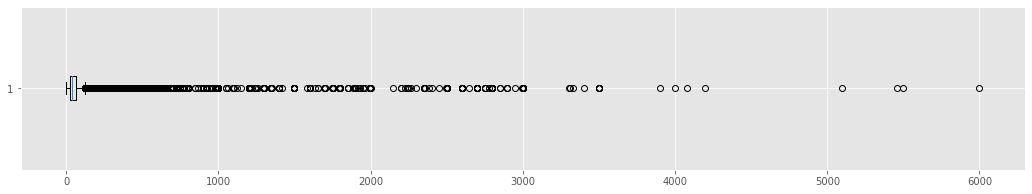

In [251]:
cleanedList = [x for x in list(local.iloc[np.argsort(list(local['Unit Price']))[:-25799]]['Unit Price']) if str(x) != 'nan']
plt.figure(figsize=(18,3))
_=plt.boxplot(cleanedList,vert=False)

In [252]:
pd.Series(cleanedList).describe()

count   94777.000
mean       62.399
std       134.638
min         0.148
25%        25.000
50%        39.000
75%        64.833
max      5999.000
dtype: float64

## Goods

In [218]:
goods = df1[(df1.Segment == 'Goods')]
goods.describe()

,Units Sold,Billings
count,15234.000,15234.000
mean,683.980,18527.351
std,1924.979,66017.299
min,-1714.512,-147360.375
25%,34.224,1245.368
50%,189.796,5066.371
75%,591.652,14511.409
max,59800.000,2874885.000


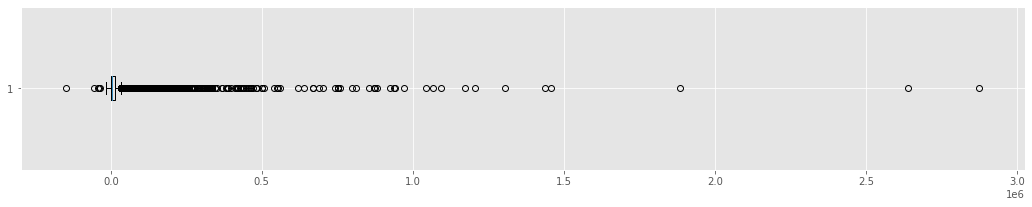

In [219]:
plt.figure(figsize=(18,3))
_=plt.boxplot(goods['Billings'],vert=False)

In [222]:
goods.iloc[np.argsort(list(goods['Billings']))[-5:]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
118321,gg-brookstone-25-for-50-worth-of-merchandise-i...,57500.000,1437500.000,2013-12-02,http://www.groupon.com/deals/gg-brookstone-25-...,Goods,Third - Party
109900,gg-google-nexus-7-by-asus-16gb-or-32gb,10046.400,1456627.536,2013-11-27,http://www.groupon.com/deals/gg-google-nexus-7...,Goods,First - Party
76117,gg-one-year-sams-club-membership-package,41860.000,1883700.000,2013-11-06,http://www.groupon.com/deals/gg-one-year-sams-...,Goods,Third - Party
64622,gg-beats-by-dr-dre-beats-studio-over-the-ear-h...,15520.860,2638390.991,2013-11-18,http://www.groupon.com/deals/gg-beats-by-dr-dr...,Goods,First - Party
121307,gg-dyson-dc40-animal-upright-vacuum-cleaner,11500.000,2874885.000,2013-12-12,http://www.groupon.com/deals/gg-dyson-dc40-ani...,Goods,First - Party


In [224]:
goods.iloc[np.argsort(list(goods['Billings']))[:5]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
44690,gg-samsung-hw-e450-audiobar,-982.468,-147360.375,2013-09-25,http://www.groupon.com/deals/gg-samsung-hw-e45...,Goods,First - Party
43996,gg-1-lg-60ls5750,-50.140,-55153.499,2013-09-21,http://www.groupon.com/deals/gg-1-lg-60ls5750,Goods,First - Party
42283,gg-asus-transformer-tf700-with-dock,-117.944,-42933.841,2013-09-17,http://www.groupon.com/deals/gg-asus-transform...,Goods,First - Party
44458,gg-1-toshiba-laptops-p75-a7200,-70.196,-38607.098,2013-09-24,http://www.groupon.com/deals/gg-1-toshiba-lapt...,Goods,First - Party
40097,gg-seven7-womens-jeans-and-denim-leggings,-983.572,-34415.184,2013-09-08,http://www.groupon.com/deals/gg-seven7-womens-...,Goods,First - Party


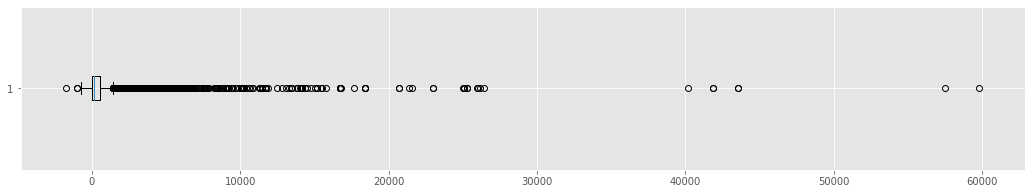

In [220]:
plt.figure(figsize=(18,3))
_=plt.boxplot(goods['Units Sold'],vert=False)

In [225]:
goods.iloc[np.argsort(list(goods['Units Sold']))[:5]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
44462,gg-hype-wireless-mouse,-1714.512,-11984.439,2013-09-24,http://www.groupon.com/deals/gg-hype-wireless-...,Goods,First - Party
40097,gg-seven7-womens-jeans-and-denim-leggings,-983.572,-34415.184,2013-09-08,http://www.groupon.com/deals/gg-seven7-womens-...,Goods,First - Party
44690,gg-samsung-hw-e450-audiobar,-982.468,-147360.375,2013-09-25,http://www.groupon.com/deals/gg-samsung-hw-e45...,Goods,First - Party
15760,gg-geneva-silicone-watch,-711.712,-4974.867,2013-04-26,http://www.groupon.com/deals/gg-geneva-silicon...,Goods,First - Party
45271,gg-rockstar-personal-massager-1,-691.656,-13826.203,2013-09-26,http://www.groupon.com/deals/gg-rockstar-perso...,Goods,First - Party


In [226]:
goods.iloc[np.argsort(list(goods['Units Sold']))[-5:]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
76117,gg-one-year-sams-club-membership-package,41860.000,1883700.000,2013-11-06,http://www.groupon.com/deals/gg-one-year-sams-...,Goods,Third - Party
78180,gg-b2g1-usa-nutra-labs-garcinia-cambogia,43534.400,853508.656,2013-11-25,http://www.groupon.com/deals/gg-b2g1-usa-nutra...,Goods,First - Party
48996,gg-garcinia-cambogia-1300,43534.400,1067831.856,2013-10-04,http://www.groupon.com/deals/gg-garcinia-cambo...,Goods,First - Party
118321,gg-brookstone-25-for-50-worth-of-merchandise-i...,57500.000,1437500.000,2013-12-02,http://www.groupon.com/deals/gg-brookstone-25-...,Goods,Third - Party
120521,gg-b2g1-usa-nutra-labs-garcinia-cambogia-1,59800.000,1172402.000,2013-12-07,http://www.groupon.com/deals/gg-b2g1-usa-nutra...,Goods,First - Party


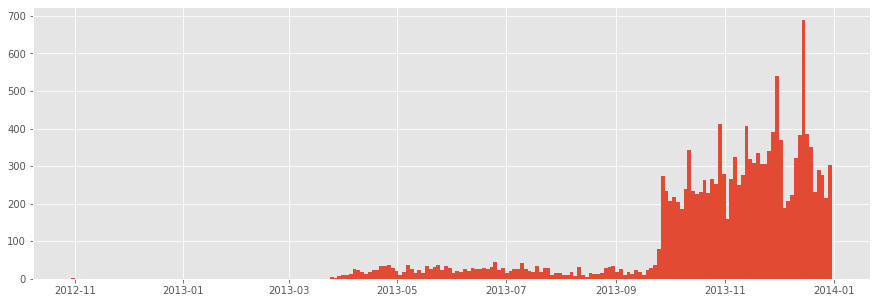

In [227]:
plt.figure(figsize=(15,5))
_=plt.hist(goods['Start Date'],bins=200)

In [238]:
goods['Unit Price'] = goods.apply(lambda x: np.nan if x['Billings'] == 0 else x['Billings']/x['Units Sold'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


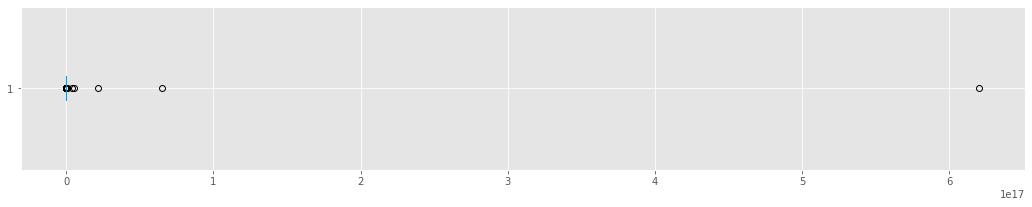

In [249]:
cleanedList = [x for x in list(goods['Unit Price']) if str(x) != 'nan']
plt.figure(figsize=(18,3))
_=plt.boxplot(cleanedList,vert=False)

In [254]:
goods.iloc[np.argsort(list(goods['Unit Price']))[:5]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
77799,gg-samsung-galaxy-s4-mini-in-black,471.316,4.713,2013-11-23,http://www.groupon.com/deals/gg-samsung-galaxy...,Goods,Third - Party,0.010
131642,gg-sterling-silver-cross-pendants,301.162,331.037,2013-12-01,http://www.groupon.com/deals/gg-sterling-silve...,Goods,First - Party,1.099
56454,gg-iluv-keeper-earphone-winder-with-ear-tips,1367.580,2721.484,2013-10-24,http://www.groupon.com/deals/gg-iluv-keeper-ea...,Goods,First - Party,1.990
76049,gg-10-device-universal-remote,451.260,898.007,2013-11-05,http://www.groupon.com/deals/gg-10-device-univ...,Goods,First - Party,1.990
42966,gg-iluv-keeper-earphone-winder,71.576,142.436,2013-09-19,http://www.groupon.com/deals/gg-iluv-keeper-ea...,Goods,First - Party,1.990


In [265]:
goods.iloc[np.argsort(list(goods['Unit Price']))[-561:-554]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
33450,gg-rlc-ultimate-bed-bug-mattress-protector,-0.000,-50.140,2013-08-13,http://www.groupon.com/deals/gg-rlc-ultimate-b...,Goods,First - Party,479387069710343.750
26964,gg-1-jessica-simpson-jewelry,-0.000,-13.340,2013-07-11,http://www.groupon.com/deals/gg-1-jessica-simp...,Goods,First - Party,627905717277627.000
15933,gg-ca-jbw-mixed-diamond-watches,0.000,86.710,2013-05-01,http://www.groupon.com/deals/gg-ca-jbw-mixed-d...,Goods,First - Party,3690993607649413.500
23700,gg-vintage-themed-diamond-jewelry,-0.000,-13.340,2013-06-24,http://www.groupon.com/deals/gg-vintage-themed...,Goods,First - Party,5023245738220859.000
15655,gg-petstages-dog-toys-2,0.000,278.760,2013-04-24,http://www.groupon.com/deals/gg-petstages-dog-...,Goods,First - Party,21321729485832216.000
25880,gg-evening-clutch-handbag,0.000,40.020,2013-07-06,http://www.groupon.com/deals/gg-evening-clutch...,Goods,First - Party,65302194596872192.000
17732,gg-white-diamond-heart-pendant-necklaces,-0.000,-126.730,2013-05-23,http://www.groupon.com/deals/gg-white-diamond-...,Goods,First - Party,620370848670285952.000


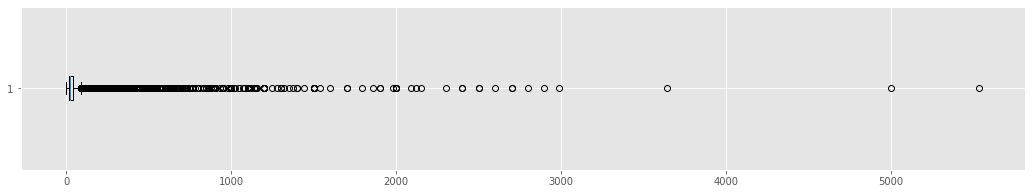

In [266]:
cleanedList = [x for x in list(goods.iloc[np.argsort(list(goods['Unit Price']))[:-561]]['Unit Price']) if str(x) != 'nan']
plt.figure(figsize=(18,3))
_=plt.boxplot(cleanedList,vert=False)

## Travel

In [268]:
travel = df1[(df1.Segment == 'Travel')]
travel.describe()

,Units Sold,Billings
count,2724.000,2724.000
mean,139.101,25900.170
std,268.946,70757.973
min,-424.000,-75024.000
25%,2.900,288.188
50%,37.200,5759.800
75%,155.650,23840.350
max,3511.800,1552777.400


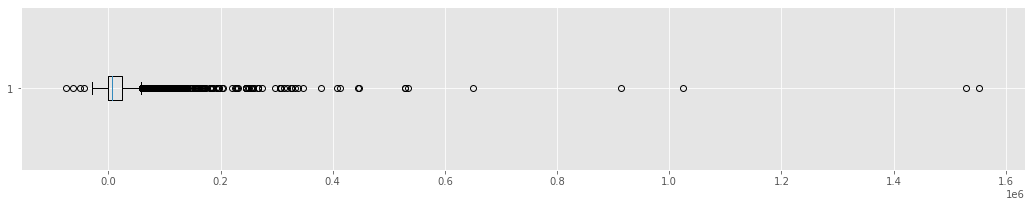

In [269]:
plt.figure(figsize=(18,3))
_=plt.boxplot(travel['Billings'],vert=False)

In [271]:
travel.iloc[np.argsort(list(travel['Billings']))[-5:]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
68033,ga-great-value-vacations-ireland-1,499.300,649765.700,2013-11-25,http://www.groupon.com/deals/ga-great-value-va...,Travel,Third - Party
57898,ga-gate-1-travel-iceland,1030.200,913684.800,2013-10-31,http://www.groupon.com/deals/ga-gate-1-travel-...,Travel,Third - Party
50474,ga-great-value-vacations-10-ireland-2,1040.000,1023770.000,2013-10-08,http://www.groupon.com/deals/ga-great-value-va...,Travel,Third - Party
58415,ga-gate-1-travel-23-peru-miami,923.650,1529646.350,2013-11-01,http://www.groupon.com/deals/ga-gate-1-travel-...,Travel,Third - Party
56577,ga-great-value-vacations-11-ireland-1,1337.600,1552777.400,2013-10-25,http://www.groupon.com/deals/ga-great-value-va...,Travel,Third - Party


In [272]:
travel.iloc[np.argsort(list(travel['Billings']))[:5]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
42305,ga-celebration-cruise-line-46,-424.000,-75024.000,2013-09-17,http://www.groupon.com/deals/ga-celebration-cr...,Travel,Third - Party
42315,ga-beyond-boundaries-travel-danube-river,-27.700,-63087.300,2013-09-17,http://www.groupon.com/deals/ga-beyond-boundar...,Travel,Third - Party
37689,ga-affordable-asia-tours-china-thailand,-31.400,-49918.600,2013-08-30,http://www.groupon.com/deals/ga-affordable-asi...,Travel,Third - Party
40450,ga-earthbox-inn-spa,-271.000,-42965.000,2013-09-10,http://www.groupon.com/deals/ga-earthbox-inn-spa,Travel,Third - Party
42295,ga-worldwide-vacation-travel-inc,-98.100,-29331.900,2013-09-17,http://www.groupon.com/deals/ga-worldwide-vaca...,Travel,Third - Party


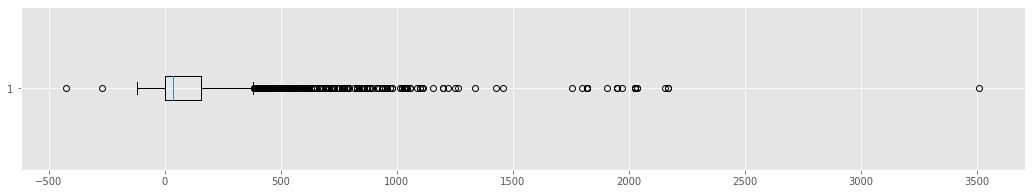

In [274]:
plt.figure(figsize=(18,3))
_=plt.boxplot(travel['Units Sold'],vert=False)

In [275]:
travel.iloc[np.argsort(list(travel['Units Sold']))[-5:]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
77896,ga-maui-sands-resort-indoor-waterpark-2-akron-...,2038.000,258684.000,2013-11-24,http://www.groupon.com/deals/ga-maui-sands-res...,Travel,Third - Party
56203,ga-maui-sands-resort-indoor-waterpark-1,2157.900,266358.500,2013-10-22,http://www.groupon.com/deals/ga-maui-sands-res...,Travel,Third - Party
94512,ga-maui-sands-resort-indoor-waterpark-1-detroit,2168.800,267612.000,2013-10-31,http://www.groupon.com/deals/ga-maui-sands-res...,Travel,Third - Party
75729,ga-maui-sands-resort-indoor-waterpark-1-windsor,2168.800,267612.000,2013-11-01,http://www.groupon.com/deals/ga-maui-sands-res...,Travel,Third - Party
132394,ga-bk-revel-1,3511.800,296715.200,2013-12-23,http://www.groupon.com/deals/ga-bk-revel-1,Travel,Third - Party


In [276]:
travel.iloc[np.argsort(list(travel['Units Sold']))[:5]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
42305,ga-celebration-cruise-line-46,-424.000,-75024.000,2013-09-17,http://www.groupon.com/deals/ga-celebration-cr...,Travel,Third - Party
40450,ga-earthbox-inn-spa,-271.000,-42965.000,2013-09-10,http://www.groupon.com/deals/ga-earthbox-inn-spa,Travel,Third - Party
40454,ga-the-lodge-at-the-mountain-village-1,-119.900,-8273.100,2013-09-10,http://www.groupon.com/deals/ga-the-lodge-at-t...,Travel,Third - Party
42295,ga-worldwide-vacation-travel-inc,-98.100,-29331.900,2013-09-17,http://www.groupon.com/deals/ga-worldwide-vaca...,Travel,Third - Party
43121,ga-splash-lagoon,-87.200,-10900.000,2013-09-20,http://www.groupon.com/deals/ga-splash-lagoon,Travel,Third - Party


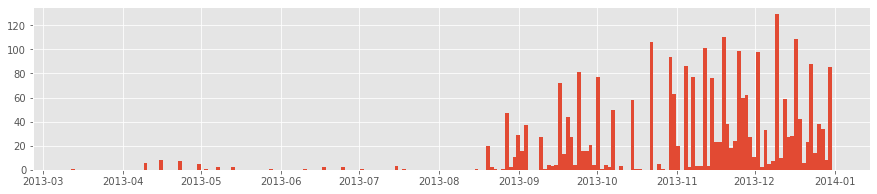

In [278]:
plt.figure(figsize=(15,3))
_=plt.hist(travel['Start Date'],bins=200)

In [279]:
travel['Unit Price'] = travel.apply(lambda x: np.nan if x['Billings'] == 0 else x['Billings']/x['Units Sold'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


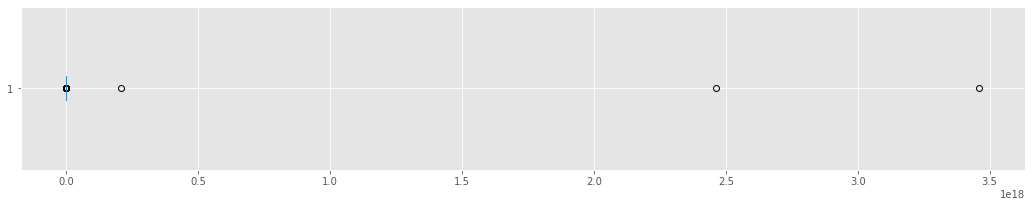

In [280]:
cleanedList = [x for x in list(travel['Unit Price']) if str(x) != 'nan']
plt.figure(figsize=(18,3))
_=plt.boxplot(cleanedList,vert=False)

In [283]:
travel.iloc[np.argsort(list(travel['Unit Price']))[:5]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
122239,ga-bk-fiesta-henderson,74.400,1041.600,2013-12-23,http://www.groupon.com/deals/ga-bk-fiesta-hend...,Travel,Third - Party,14.000
76089,ga-bk-palace-station-hotel-casino-2,468.700,6867.000,2013-11-05,http://www.groupon.com/deals/ga-bk-palace-stat...,Travel,Third - Party,14.651
94196,ga-bk-boulder-station-hotel-casino-2,99.200,1587.200,2013-10-29,http://www.groupon.com/deals/ga-bk-boulder-sta...,Travel,Third - Party,16.000
130263,ga-bk-palace-station-hotel-casino-3,457.800,7706.300,2013-12-17,http://www.groupon.com/deals/ga-bk-palace-stat...,Travel,Third - Party,16.833
94148,ga-avis-car-rental-orlando,1820.000,36400.000,2013-10-29,http://www.groupon.com/deals/ga-avis-car-renta...,Travel,Third - Party,20.000


In [301]:
travel.iloc[np.argsort(list(travel['Unit Price']))[-470:-467]]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unit Price
42384,ga-kenai-peninsula-suites,0.000,1488.000,2013-09-17,http://www.groupon.com/deals/ga-kenai-peninsul...,Travel,Third - Party,209417382672728192.000
42300,ga-chachagua-rainforest-hotel-hacienda-1,0.000,1641.400,2013-09-17,http://www.groupon.com/deals/ga-chachagua-rain...,Travel,Third - Party,2464069476121977344.000
42291,ga-ambergris-dive-resort-1,0.000,1537.000,2013-09-17,http://www.groupon.com/deals/ga-ambergris-dive...,Travel,Third - Party,3461016313634226688.000


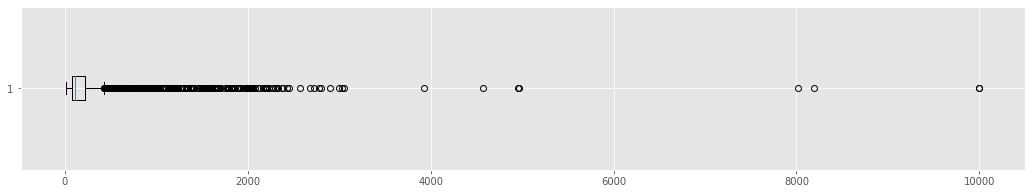

In [315]:
cleanedList = [x for x in list(travel.iloc[np.argsort(list(travel['Unit Price']))[:-470]]['Unit Price']) if str(x) != 'nan']
plt.figure(figsize=(18,3))
_=plt.boxplot(cleanedList,vert=False)

## Remove deals with small units sold 

In [326]:
df[(df['Units Sold']>0)& (df['Units Sold']<0.1)&(df['Billings'] > 0.1)]

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,remove_www
14266,charles-river-charters,0.000,1488.000,2013-04-10,http://www.groupon.com/deals/charles-river-cha...,Local,Third - Party,charles-river-charters
15655,gg-petstages-dog-toys-2,0.000,278.760,2013-04-24,http://www.groupon.com/deals/gg-petstages-dog-...,Goods,First - Party,gg-petstages-dog-toys-2
15877,cinestores-com-1-stlouis,0.000,58.000,2013-04-29,http://www.groupon.com/deals/cinestores-com-1-...,Local,Third - Party,cinestores-com-1-stlouis
15933,gg-ca-jbw-mixed-diamond-watches,0.000,86.710,2013-05-01,http://www.groupon.com/deals/gg-ca-jbw-mixed-d...,Goods,First - Party,gg-ca-jbw-mixed-diamond-watches
17512,it-university-online-41-saskatoon,0.000,11.310,2013-05-22,http://www.groupon.com/deals/it-university-onl...,Local,Third - Party,it-university-online-41-saskatoon
18892,made-ya-look,0.000,2659.600,2013-05-30,http://www.groupon.com/deals/made-ya-look,Local,Third - Party,made-ya-look
20169,great-river-road-golf-club-nauvoo,0.000,58.000,2013-06-06,http://www.groupon.com/deals/great-river-road-...,Local,Third - Party,great-river-road-golf-club-nauvoo
20852,jazzercise-us-south-bend,0.000,43.500,2013-06-10,http://www.groupon.com/deals/jazzercise-us-sou...,Local,Third - Party,jazzercise-us-south-bend
20895,jazzercise-us-evansville,0.000,72.500,2013-06-10,http://www.groupon.com/deals/jazzercise-us-eva...,Local,Third - Party,jazzercise-us-evansville
21407,suna-salon-spa-4,0.000,102.950,2013-06-13,http://www.groupon.com/deals/suna-salon-spa-4,Local,Third - Party,suna-salon-spa-4
